In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from abc import ABC

In [85]:
class Regression(ABC):
    def __init__(self):
        self.W = 1
        self.b = 1
        self.batch_idx = 0
        self.barch_size = None

    def parameters(self):
        return [self.W, self.b]

    def forward(self, X):
        return X @ self.W[self.batch_idx].T + self.b[self.batch_idx]

    def __call__(self, inputs):
        return self.forward(inputs)

    def loss(self, outputs, targets):
        pass

    def calculate_gradients(self, batch_x, outputs, batch_y):
        pass

    def fit(self, X, y, epochs, batch_size, lr):

        num_train = X.shape[0]
        num_features = X.shape[1]
        num_batches = num_train // batch_size

        if self.W is None:
            self.W = 0.001 * np.random.randn(num_batches, num_features)
        if self.b is None:
            self.b = 0.001 * np.random.randn(num_batches, 1)
        history = []
        running_loss = 0
        for epoch in range(epochs):
            np.random.shuffle(X)
            for i in range(num_batches):
                self.batch_idx = i
                batch_x = X[i * batch_size:i * batch_size + batch_size, :-1],
                batch_y = X[i * batch_size:i * batch_size + batch_size:, -1:]
                outputs = self.forward(batch_x)
                running_loss += self.loss(outputs, batch_y)
                dW, db = self.calculate_gradients(batch_x, outputs, batch_y)
                self.W = self.W - lr * dW
                self.b = self.b - lr * db
            running_loss /= batch_size
            history.append(running_loss)
        return history

    def predict(self, X):
        return X @ self.W.T + self.b


class LinearRegression(Regression):
    def loss(self, outputs, labels):
        return np.mean((outputs - labels) ** 2)

    def calculate_gradients(self, batch_x, outputs, batch_y):
        batch_size = len(batch_x)
        dW = (2 / batch_size) * batch_x.T @ (outputs - batch_y)
        db = (2 / batch_size) * np.sum(outputs - batch_y)
        return dW, db


In [86]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1243)

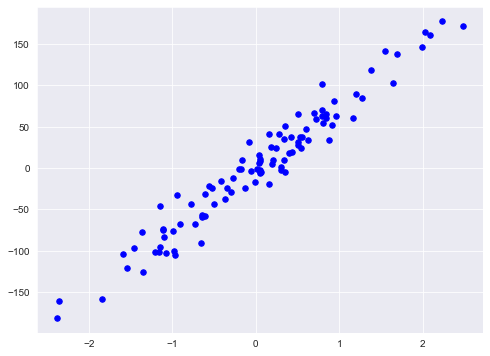

In [87]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show()

In [88]:
linreg = LinearRegression()
history = linreg.fit(X, y, epochs=30, batch_size=10, lr=1e-3)

TypeError: 'int' object is not subscriptable

In [89]:
x = 0.001 * np.random.randn(10, 5)
x[1]

array([-0.00060972, -0.00252422,  0.00091845, -0.00039684,  0.00019907])

In [84]:
np.random.shuffle(x)
x1 == x

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [90]:
i = 0
batch_size = 2
x[i * batch_size:i * batch_size + batch_size, :-1]

array([[-0.00058244,  0.00045987, -0.00164007,  0.00206723],
       [-0.00060972, -0.00252422,  0.00091845, -0.00039684]])

In [63]:
x[:, -1:]

array([[ 9.13940026e-04],
       [-5.31912434e-04],
       [ 2.38607064e-06],
       [-7.24575608e-04],
       [ 2.71161990e-04],
       [-8.59352165e-04],
       [-1.44480117e-03],
       [ 8.91161079e-04],
       [ 1.61144027e-04],
       [ 1.27673502e-03]])

In [67]:
z

In [65]:
print(*x)

[0.0004688  0.00048015 0.00041116 0.0002522  0.00091394] [ 7.09442429e-04  1.61423208e-03  8.70517937e-05  1.40475814e-03
 -5.31912434e-04] [-3.29268430e-04 -5.97397164e-04  1.15014180e-03  6.57280789e-04
  2.38607064e-06] [ 3.61103015e-06 -1.64117241e-03 -1.82616325e-04  1.70374778e-03
 -7.24575608e-04] [ 9.95942283e-04 -4.96035813e-04 -1.35595829e-05 -8.34387390e-05
  2.71161990e-04] [ 1.78661572e-03 -9.29215927e-04  8.18317903e-05 -2.25992712e-04
 -8.59352165e-04] [ 1.34664044e-03  4.97574227e-05 -1.49440595e-03  7.92990459e-04
 -1.44480117e-03] [ 5.45560369e-06 -1.15948397e-03 -1.49061498e-04 -2.21556751e-04
  8.91161079e-04] [-0.00123822 -0.00030749 -0.00128414 -0.00011848  0.00016114] [ 0.00063122 -0.00174829 -0.00074779  0.00035852  0.00127674]


In [7]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [48]:
iris = datasets.load_iris()
X, y = iris.data[48:54], iris.target[48:54]

In [11]:
data1 = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                     columns=iris['feature_names'] + ['target'])
data1[48:54].to_excel('../data/iris.xlsx')

In [127]:
def get_m():
    for c in [0, 1]:
        X_c = X[y == c]
        yield X_c.mean(axis=0), X_c.var(axis=0), X_c.shape[0] / X.shape[0]

In [128]:
m1, v1, prior1 = list(get_m())[0]
m2, v2, prior2 = list(get_m())[1]

In [129]:
def pdf(mean, var, x):
    numerator = np.exp(-((x - mean) ** 2) / (2 * var))
    denominator = np.sqrt(2 * np.pi * var)
    return numerator / denominator

In [115]:
X[y == 1]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3]])

In [119]:
v2

array([0.3525  , 0.1425  , 0.111875, 0.006875])

In [102]:
m1

array([5.15, 3.5 , 1.45, 0.15])

In [136]:
for x in X:
    print(np.sum(np.log(pdf(m2, v2, x))) + np.log(prior2))

-171.42857886587686
-155.19425100197824
0.168755782350211
0.3647295458979673
-0.4043058441938075
-4.131347100122064


In [2]:
np.random.choice(5, 2, replace=False)

array([3, 2])

In [3]:
np.log(0)

C:\Users\Den Ka\AppData\Local\Temp\ipykernel_7816\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [2]:
import torch
from torchvision import models

In [3]:
model = models.densenet161(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to C:\Users\Den Ka/.cache\torch\hub\checkpoints\densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

In [4]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [9]:
model.features.denseblock1.denselayer1.conv1

Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)

In [10]:
model2 = models.efficientnet_b6(pretrained=True)

Downloading: "https://download.pytorch.org/models/efficientnet_b6_lukemelas-c76e70fd.pth" to C:\Users\Den Ka/.cache\torch\hub\checkpoints\efficientnet_b6_lukemelas-c76e70fd.pth


  0%|          | 0.00/165M [00:00<?, ?B/s]